<h1><center>Rainfall Prediction</center></h1>
<center><h2> The dataset is taken from kaggle, link to the dataset is <a href="https://www.kaggle.com/rajanand/rainfall-in-india?select=rainfall+in+india+1901-2015.csv"> here</a></h2></center>

## Import the Libraries

In [50]:
# importing the required libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

## Read the Data

In [51]:
# reading the data
data = pd.read_csv("rainfall in india 1901-2015.csv")
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## Data Exploration and Pre-Processing

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [53]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

In [54]:
data.duplicated().sum()

0

In [55]:
data['SUBDIVISION'].value_counts()

SUBDIVISION
WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH    

In [56]:
# filling na values with mean
data = data.dropna()

In [57]:
data.head(3)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6


In [58]:
data.isnull().any()

SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [59]:
data.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1925,
       1926, 1927, 1928, 1929, 1930, 1931, 1933, 1934, 1935, 1937, 1938,
       1939, 1940, 1941, 1946, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 1923, 1924, 1932, 1936, 1942, 1943,
       1944, 1945, 1947, 1948, 1909], dtype=int64)

In [60]:
data.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,1958.321271,18.818484,21.644792,27.252494,42.714548,84.868044,228.928020,346.496968,289.897506,197.003056,95.139022,39.548191,18.695575,1411.008900,40.462861,154.835452,1062.325575,153.384499
std,33.148944,33.521719,35.762010,46.829179,67.264863,122.556801,233.535693,269.352685,187.702293,135.266708,99.325638,68.275513,42.185553,903.846565,59.136229,200.315769,705.970202,166.414108
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.500000,70.000000,175.225000,155.925000,100.400000,14.600000,0.700000,0.100000,804.500000,4.100000,23.800000,573.275000,34.025000
50%,1959.000000,5.900000,6.600000,7.800000,15.500000,36.050000,138.450000,284.300000,259.500000,173.600000,64.650000,9.500000,3.000000,1121.300000,19.000000,74.250000,880.200000,97.550000
75%,1987.000000,21.950000,26.600000,31.100000,49.375000,94.975000,302.250000,416.700000,377.775000,265.600000,148.100000,45.475000,17.300000,1644.775000,50.200000,195.300000,1286.175000,211.800000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [61]:
data.shape

(4090, 19)

## Data Visualization

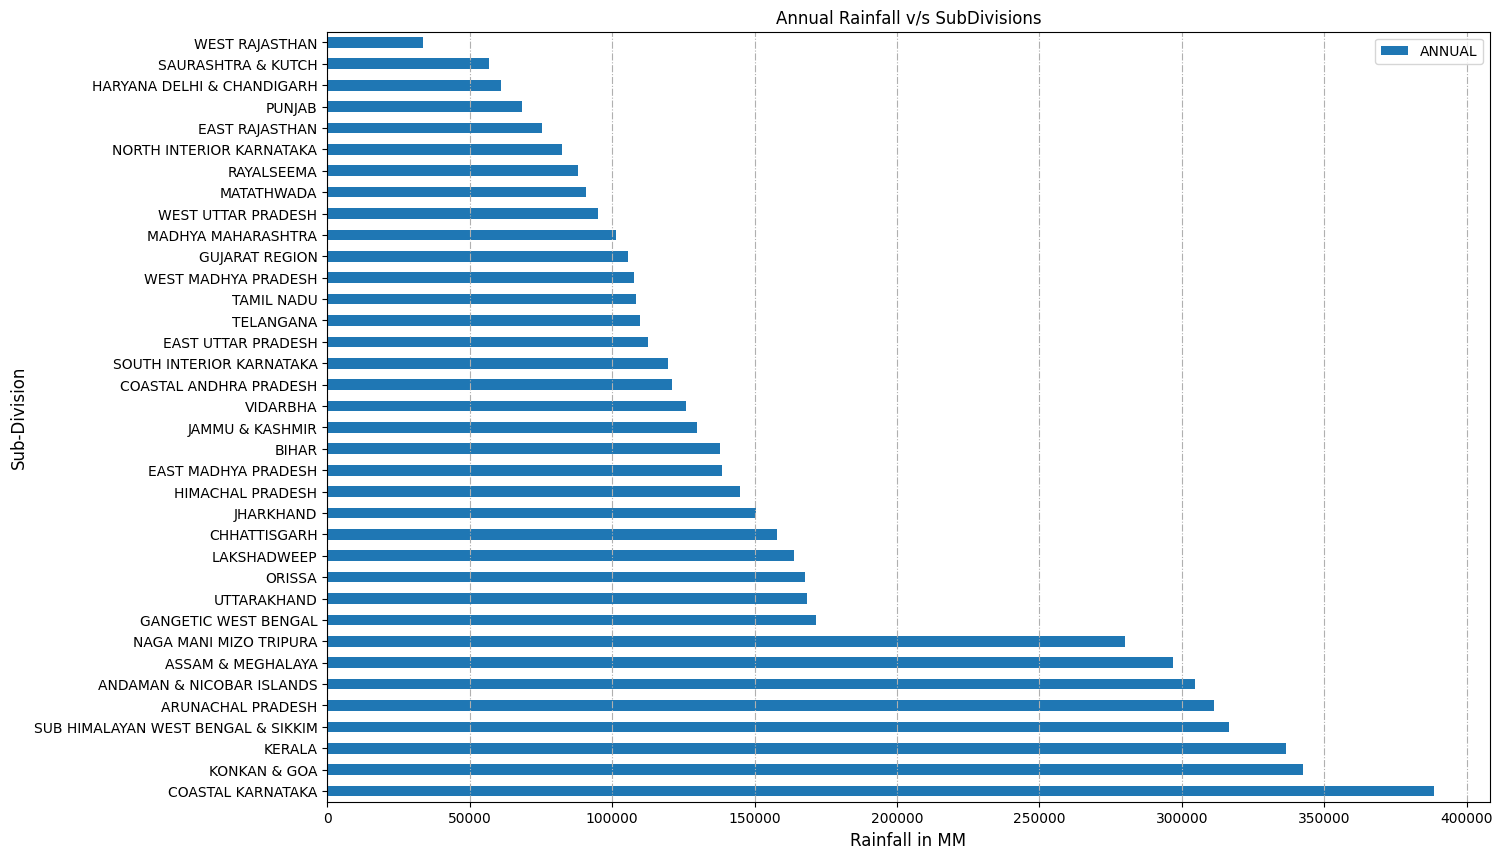

In [62]:
data[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()

`Above plot shows the total rainfall from year 1901-2015 in each subdivision,
 from the above plot we note that:-
 1)west Rajasthan,punjab,delhi have recieved the least rainfall
 2)Rainfall was more in western states tripura,meghalaya,Arunachal Pradesh,kerala,Goa,karnatka,and also in Andaman`

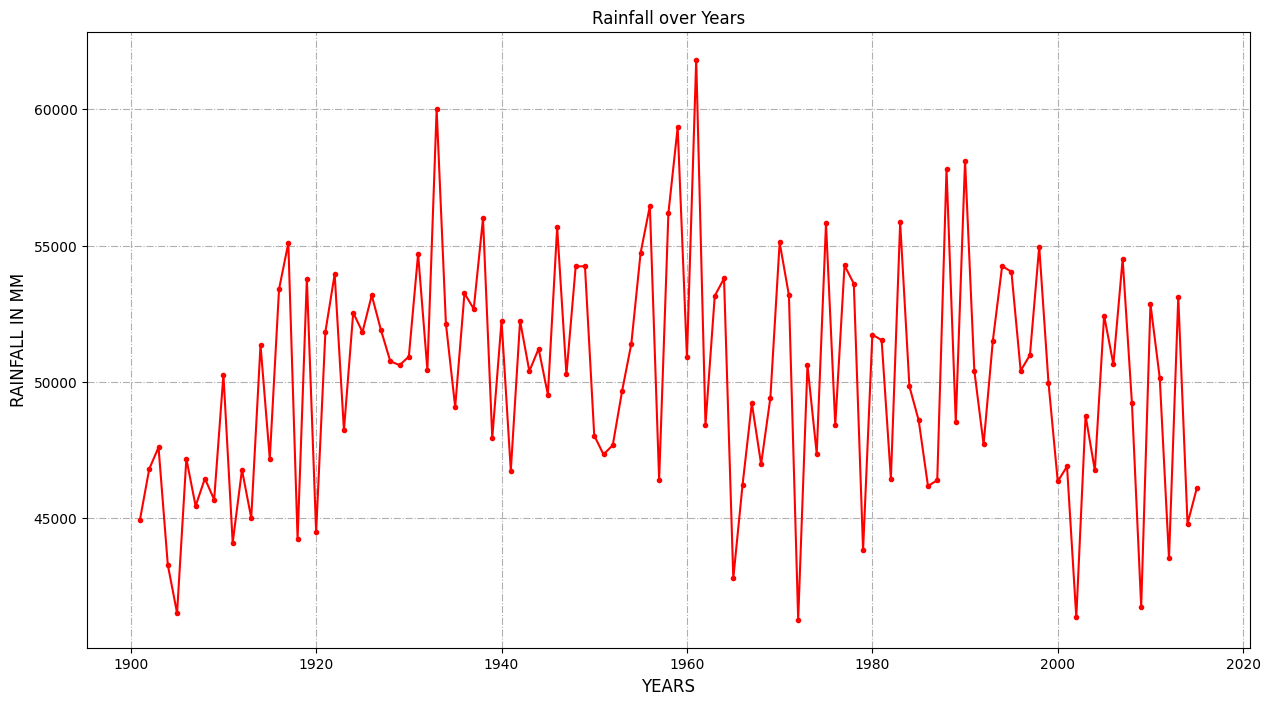

In [63]:
plt.figure(figsize=(15,8))
data.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="r",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()

`Above graph shows the Rainfall from 1901-2015 in India,
 we observe that :-
 1)The maximum Rainfall was in 1950s`

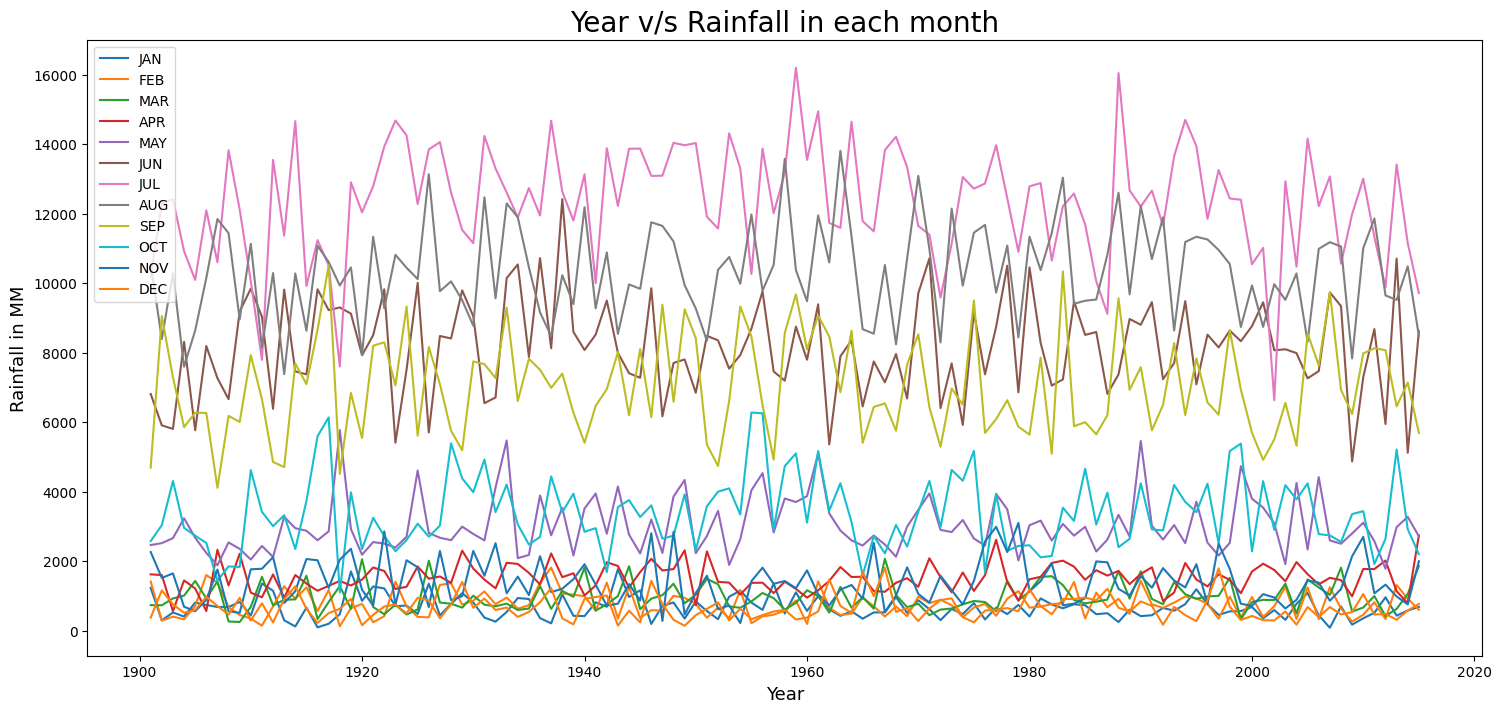

In [64]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(18,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()

`Above plot shows the Year vs Rainfall in each month,
 we observe that:-
 1)July has heavy rainfall 
 2)Feb has least rainfall `

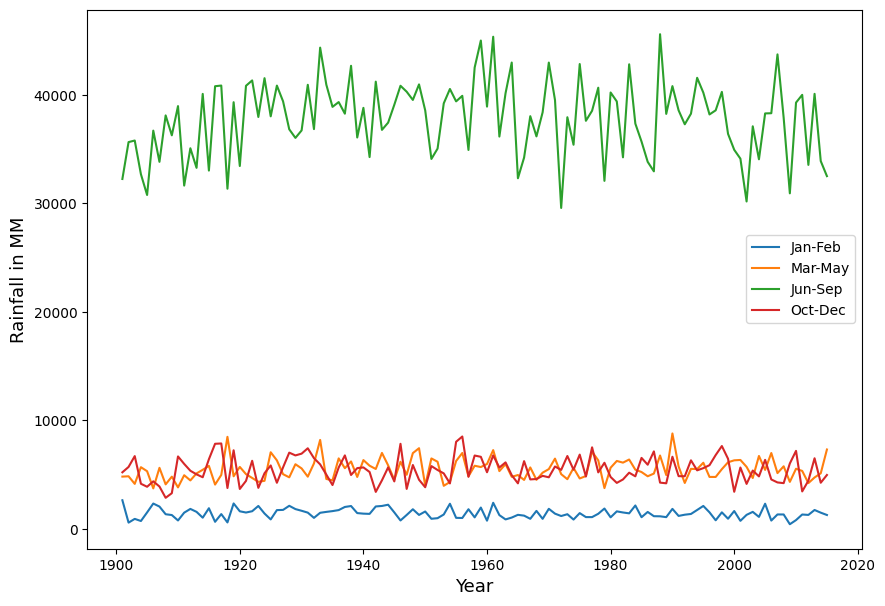

In [65]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(10,7))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()

`From Above Graph we observe that :-
 1)combined jun,july,august,sept recieves huge rainfall
 2)combined jan,feb recieves least Rainfall`

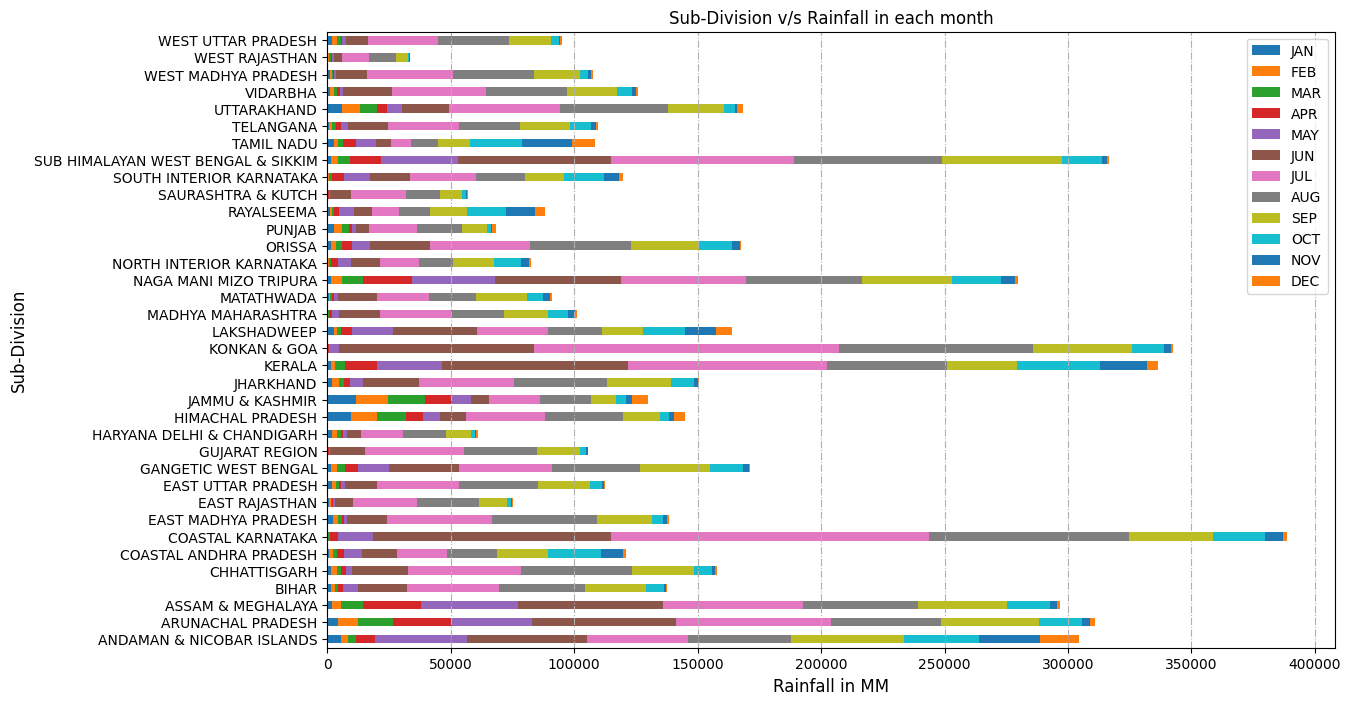

In [66]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(13,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

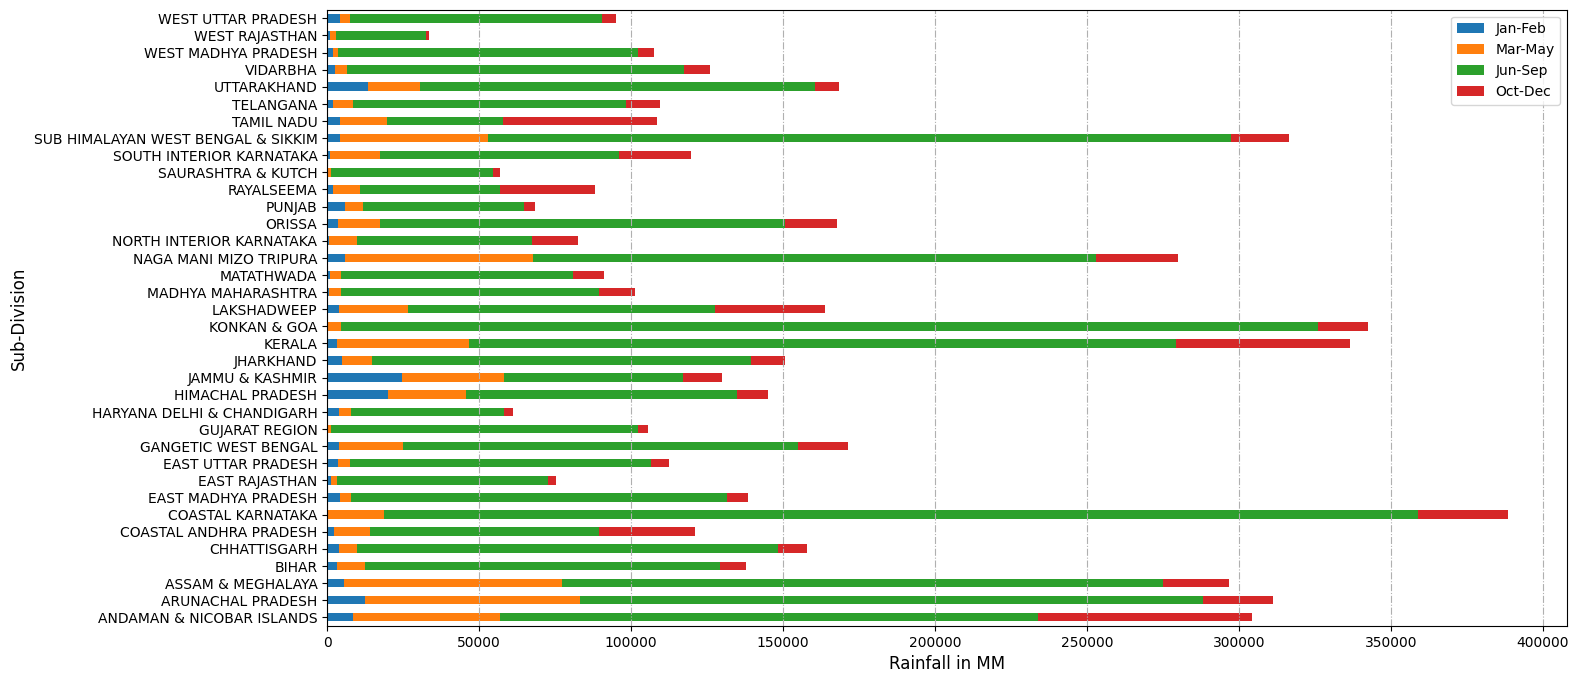

In [67]:
data[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(16,8))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()

`From the above two graph we observe that:-
    1)eastern states have good amont of rainfall in march,april,may`

In [68]:
# Analysis of rainfall data of tamil nadu
TN = data.loc[((data['SUBDIVISION'] == 'TAMIL NADU'))]
TN.head(4)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8


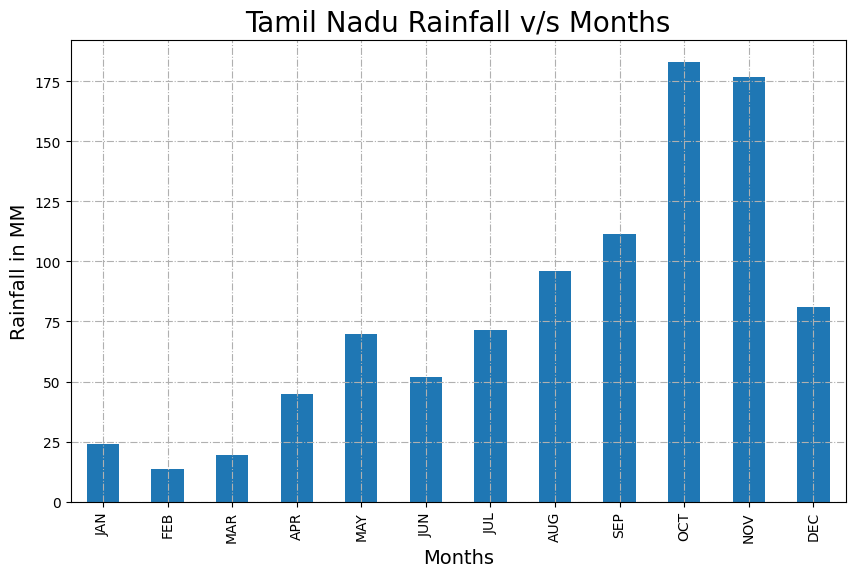

In [69]:
plt.figure(figsize=(10,6))
TN[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("Tamil Nadu Rainfall v/s Months",size=20)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()


`From the above graph we observe that:-
 1)Tamil Nadu has good amount of rainfall in oct and nov`

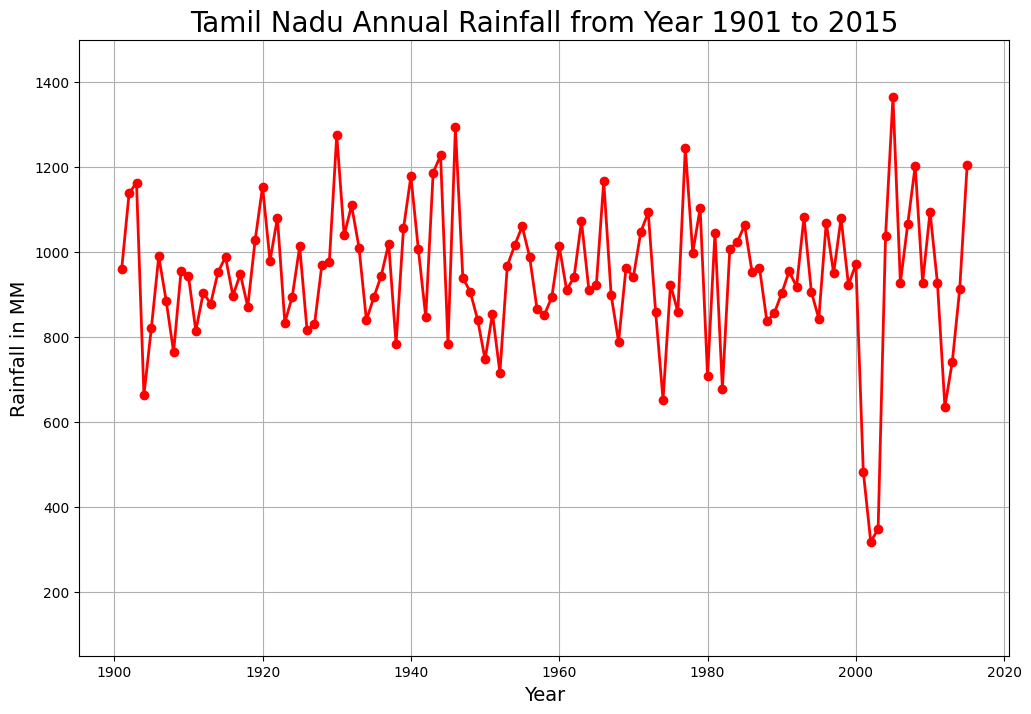

In [70]:
TN.groupby("YEAR").sum()['ANNUAL'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
plt.xlabel('Year',size=14)
plt.ylabel('Rainfall in MM',size=14)
plt.title('Tamil Nadu Annual Rainfall from Year 1901 to 2015',size=20)
plt.grid()
plt.show()

`From the Above graph we observe that:
 1)The lowest rainfall in Tamil Nadu was noted in 2002-2003
 2)and, The highest was Rainfall was noted in 2005`

In [71]:
# analysis of rainfall data of rajasthan
Rajasthan = data.loc[((data['SUBDIVISION'] == 'WEST RAJASTHAN') | (data['SUBDIVISION'] == 'EAST RAJASTHAN'))]
Rajasthan.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
1817,WEST RAJASTHAN,1901,6.7,0.0,1.1,0.0,6.1,3.0,79.0,59.2,1.0,2.1,0.0,0.6,158.9,6.7,7.2,142.2,2.7
1818,WEST RAJASTHAN,1902,0.0,0.0,0.0,0.5,4.0,49.1,27.0,71.3,41.8,1.8,0.0,0.0,195.6,0.0,4.5,189.2,1.8
1819,WEST RAJASTHAN,1903,1.7,1.3,5.5,0.0,4.2,2.7,154.8,87.1,49.3,0.1,0.0,0.5,307.0,3.0,9.7,293.8,0.5
1820,WEST RAJASTHAN,1904,3.8,2.9,16.3,0.7,11.4,14.6,39.8,45.6,21.4,1.4,2.9,7.1,167.9,6.6,28.5,121.4,11.4
1821,WEST RAJASTHAN,1905,6.3,4.8,0.7,1.3,0.3,4.9,30.1,0.6,64.5,0.0,0.0,0.9,114.4,11.0,2.4,100.1,0.9


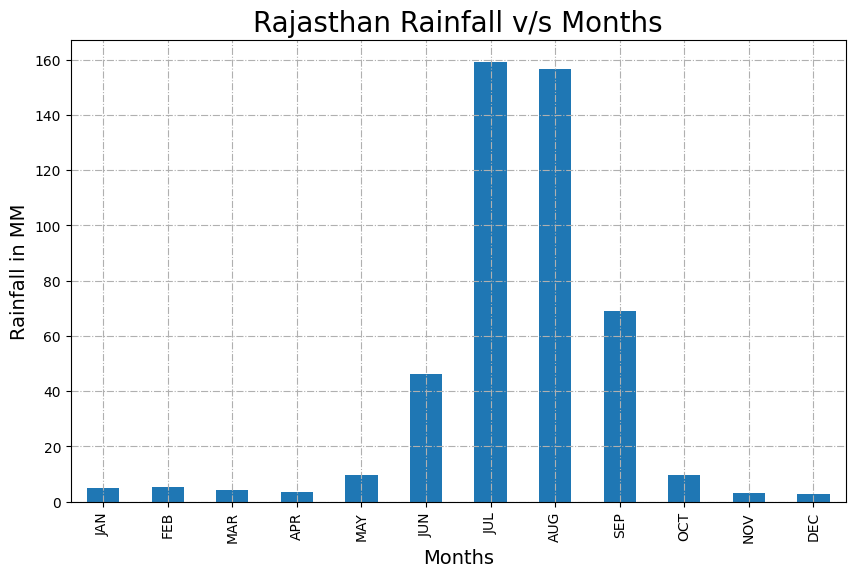

In [72]:
plt.figure(figsize=(10,6))
Rajasthan[['JAN', 'FEB', 'MAR', 'APR','MAY', 'JUN','JUL','AUG', 'SEP', 'OCT','NOV','DEC']].mean().plot(kind="bar",width=0.5,linewidth=2)
plt.title("Rajasthan Rainfall v/s Months",size=20)
plt.xlabel("Months",size=14)
plt.ylabel("Rainfall in MM",size=14)
plt.grid(axis="both",linestyle="-.")
plt.show()

`From the Above graph we observe that:-
 1)Rajasthan recieves good amount of rainfall in July and August`
 

In [73]:
# Rajasthan.groupby("YEAR").mean()['ANNUAL'].plot(ylim=(50,1500),color='r',marker='o',linestyle='-',linewidth=2,figsize=(12,8));
# plt.xlabel('Year',size=14)
# plt.ylabel('Rainfall in MM',size=14)
# plt.title('Rajasthan Annual Rainfall from Year 1901 to 2015',size=20)
# plt.grid()
# plt.show()

`From the Above graph we note that:-
 1)The large amount of rainfall in Rajasthan was noted in year 1918`

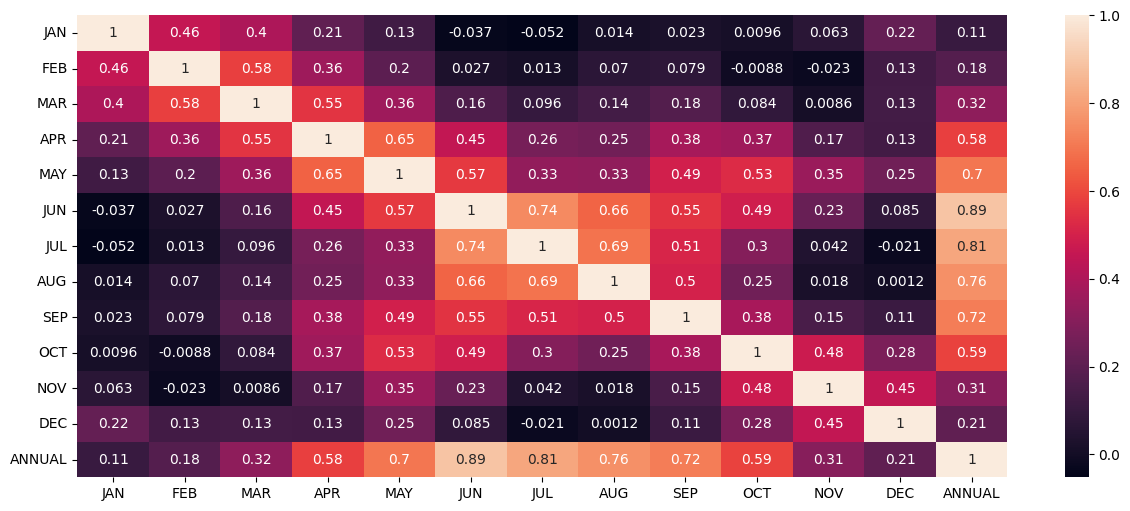

In [74]:
# correlation b/w each numeric attribute
plt.figure(figsize=(15,6))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

`The above heatmap shows the coorelation between different features in the dataset`

## Modelling 

In [75]:
data["SUBDIVISION"].nunique()

36

In [76]:
group = data.groupby(('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])
data=group.get_group(('TAMIL NADU'))
data.head()

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
df=data.melt(['YEAR']).reset_index()
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,24.5
1,1,1902,JAN,67.2
2,2,1903,JAN,19.3
3,3,1904,JAN,35.2
4,4,1905,JAN,6.5


In [ ]:
df= df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,24.5
115,115,1901,FEB,39.1
230,230,1901,MAR,21.7
345,345,1901,APR,36.0
460,460,1901,MAY,74.0


In [ ]:
df.YEAR.unique()

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [ ]:
df.columns=['Index','Year','Month','Avg_Rainfall']

In [ ]:
df.head()

,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,24.5
115,115,1901,FEB,39.1
230,230,1901,MAR,21.7
345,345,1901,APR,36.0
460,460,1901,MAY,74.0


In [ ]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(Month_map)
df.head(12)

,Index,Year,Month,Avg_Rainfall
0,0,1901,1,24.5
115,115,1901,2,39.1
230,230,1901,3,21.7
345,345,1901,4,36.0
460,460,1901,5,74.0
575,575,1901,6,41.8
690,690,1901,7,49.3
805,805,1901,8,67.9
920,920,1901,9,191.1
1035,1035,1901,10,122.3


In [ ]:
df.drop(columns="Index",inplace=True)

In [ ]:
df.head(2)

,Year,Month,Avg_Rainfall
0,1901,1,24.5
115,1901,2,39.1


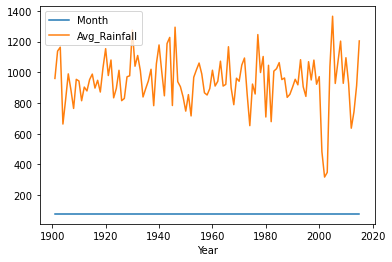

In [ ]:
df.groupby("Year").sum().plot()
plt.show()

In [ ]:
X=np.asanyarray(df[['Year','Month']]).astype('int')
y=np.asanyarray(df['Avg_Rainfall']).astype('int')
print(X.shape)
print(y.shape)

(1380, 2)
(1380,)


In [ ]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [ ]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 36.693305772295616
MSE: 2707.377549592384
RMSE: 52.032466303187896

-------Train Data--------
MAE: 37.684332030035904
MSE: 3113.2867829842517
RMSE: 55.79683488321046

-----Training Accuracy-------
41.699999999999996
-----Testing Accuracy--------
33.1


### Lasso Model

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# create a lasso object
lasso = Lasso(max_iter=100000)

# check for best alpha value using GridSearch
parameter={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,1e1,1e2,1e3,1e4,1e5,1e6,1e7]}
lasso_regressor=GridSearchCV(
    lasso,parameter,
    scoring='neg_mean_squared_error',
    cv=5
    )

In [ ]:
lasso_regressor.fit(X_train,y_train)

C:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1145601.1296435762, tolerance: 409.5182559585493
  positive)
C:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1165690.0735509305, tolerance: 413.15837128072445
  positive)
C:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1111242.455789552, tolerance: 391.17580827943084
  positive)
C:\Users\lenovo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_coordinate_de

GridSearchCV(cv=5, estimator=Lasso(max_iter=100000),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10.0,
                                   100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                                   10000000.0]},
             scoring='neg_mean_squared_error')

In [ ]:
print("Best Parameter for Lasso:",lasso_regressor.best_estimator_)

Best Parameter for Lasso: Lasso(alpha=1e-15, max_iter=100000)


In [ ]:
lasso=Lasso(alpha=100.0,max_iter=100000)

# fit into the object
lasso.fit(X_train,y_train)

Lasso(alpha=100.0, max_iter=100000)

In [ ]:
# predicting 
y_train_predict=lasso.predict(X_train)
y_test_predict=lasso.predict(X_test)

In [ ]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(lasso.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(lasso.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 41.774633175550605
MSE: 3011.4820490350985
RMSE: 54.87697193755408

-------Train Data--------
MAE: 46.667686894462854
MSE: 3948.760899348929
RMSE: 62.839166921188

-----Training Accuracy-------
26.1
-----Testing Accuracy--------
25.6


### Ridge Model

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
 
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)


{'alpha': 1e-15}
-3139.0798658992658


In [ ]:
print("Best Parameter for Ridge:",ridge_regressor.best_estimator_)

Best Parameter for Ridge: Ridge(alpha=1e-15)


In [ ]:
ridge=Ridge(alpha=100.0)

# fit into the object
ridge.fit(X_train,y_train)

Ridge(alpha=100.0)

In [ ]:
# predicting the train and test values 
y_train_predict=ridge.predict(X_train)
y_test_predict=ridge.predict(X_test)

In [ ]:

from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(ridge.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(ridge.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 36.69426499711781
MSE: 2700.4041228472124
RMSE: 51.96541275547816

-------Train Data--------
MAE: 37.71478463865123
MSE: 3113.4499194422324
RMSE: 55.798296743200254

-----Training Accuracy-------
41.699999999999996
-----Testing Accuracy--------
33.300000000000004


### Svm Model

In [ ]:
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [ ]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [ ]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


print("\n-----Training Accuracy-------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(svm_regr.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 76.73671497584542
MSE: 9936.306763285023
RMSE: 99.68102509146374

-------Train Data--------
MAE: 78.82815734989649
MSE: 11555.623188405798
RMSE: 107.4970845577023

-----Training Accuracy-------
3.5000000000000004
-----Testing Accuracy--------
1.7000000000000002


### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [ ]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [ ]:

print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

-------Test Data--------
MAE: 34.13324145851335
MSE: 2343.5819088762714
RMSE: 48.410555758804

-------Train Data--------
MAE: 25.984777573175194
MSE: 1465.5023060776432
RMSE: 38.28187960481621


In [ ]:
print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)


-----------Training Accuracy------------
72.6
-----------Testing Accuracy------------
42.1


In [ ]:
predicted = random_forest_model.predict([[2016,11]])

In [ ]:
predicted

array([148.35906367])